In [20]:
import IPython
import sys
import numpy as np
import pandas as pd
import midi
import glob
import pickle
import numpy
from music21 import converter, instrument, note, chord, pitch
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [5]:
data_path = "../midi/"
file_name = "Sonic the Hedgehog - Green Hill Zone.mid"

In [7]:
midi_obj = converter.parse(data_path+file_name)
midi_obj

<music21.stream.Score 0x266725ea970>

In [8]:
def load_midi_file(file_path):
    return converter.parse(file_path)

In [9]:
midi_obj = load_midi_file(data_path+file_name)

In [10]:
def list_instrument(midi):
    partStream = midi.parts.stream()
    print("List of instruments found on MIDIfile:")
    for p in partStream:
        aux = p 
        print(p.partName)

In [11]:
list_instrument(midi_obj)

List of instruments found on MIDIfile:
Piano


In [14]:
def extract_notes(midi_part):
    parent_element = []
    ret = []
    for nt in midi_part.flat.notes:
        if isinstance(nt,note.Note):
            ret.append(max(0.0,nt.pitch.ps))
            parent_element.append(nt)
        elif isinstance(nt, chord.Chord):
            for pitch in nt.pitches:
                ret.append(max(0.0,pitch.ps))
                parent_element.append(nt)
                
    return ret, parent_element

In [21]:
ret, parent = extract_notes(midi_obj)
print(parent)

[<music21.note.Note A>, <music21.note.Note F>, <music21.note.Note A>, <music21.note.Note A>, <music21.note.Note F>, <music21.note.Note B>, <music21.note.Note A>, <music21.note.Note G>, <music21.note.Note B>, <music21.note.Note A>, <music21.note.Note G>, <music21.note.Note C>, <music21.note.Note B->, <music21.note.Note A>, <music21.note.Note C>, <music21.note.Note B->, <music21.note.Note A>, <music21.note.Note D>, <music21.note.Note B>, <music21.note.Note B>, <music21.note.Note D>, <music21.note.Note B>, <music21.note.Note B>, <music21.chord.Chord G4 B4>, <music21.chord.Chord G4 B4>, <music21.note.Note C>, <music21.note.Note C>, <music21.note.Note C>, <music21.chord.Chord F4 A4>, <music21.chord.Chord F4 A4>, <music21.note.Note C>, <music21.note.Note C>, <music21.note.Note C>, <music21.chord.Chord G4 B4>, <music21.chord.Chord G4 B4>, <music21.note.Note C>, <music21.note.Note C>, <music21.note.Note C>, <music21.chord.Chord F4 A4>, <music21.chord.Chord F4 A4>, <music21.note.Note C>, <music

In [24]:
def print_parts_countour(midi):
    fig = plt.figure(figsize=(12, 5))
    ax = fig.add_subplot(1, 1, 1)
    minPitch = pitch.Pitch('C10').ps
    maxPitch = 0
    xMax = 0
    
    # Drawing notes
    for i in range(len(midi.parts)):
        print(i)
        top = midi.parts[i].flat.notes
        
        y, parent_element = extract_notes(top)
        if (len(y)<1): continue
            
        x = [n.offset for n in parent_element]
        ax.scatter(x,y,alpha=0.6,s=7)
            
        aux = min(y)
        if (aux < minPitch): minPitch = aux
            
        aux = max(y)
        if (aux > maxPitch): maxPitch = aux
               
        aux = max(x)
        if(aux > xMax): xMax = aux
             
        for i in range(1,10):
            linePitch = pitch.Pitch('C{0}'.format(i)).ps
            if (linePitch > minPitch and linePitch < maxPitch):
                ax.add_line(mlines.Line2D([0, xMax], [linePitch, linePitch], color='red', alpha=0.1))
                    
        plt.ylabel("Note index (each octave has 12 notes)")
        plt.xlabel("Number of quarter notes (beats)")
        plt.title('Voices motion approximation, each color is a different instrument, red lines show each octave')
        plt.show()

0


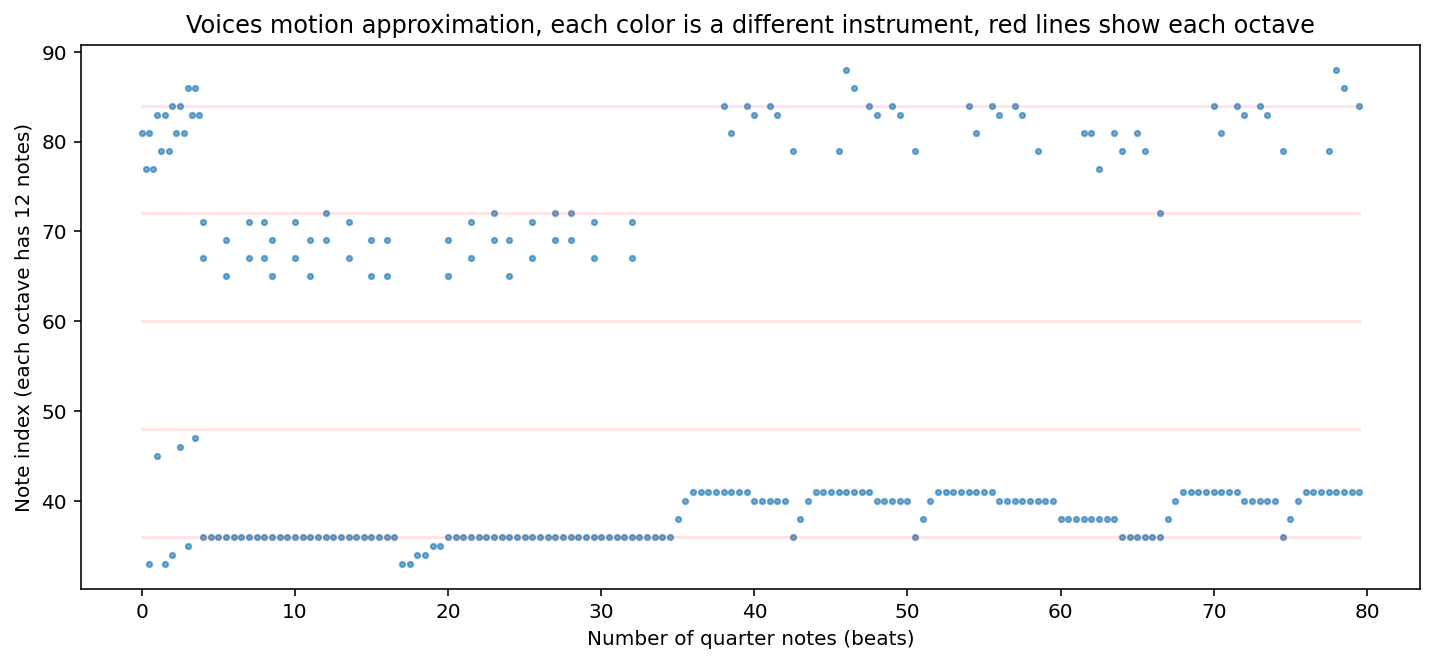

In [25]:
print_parts_countour(midi_obj.measures(0, 20))

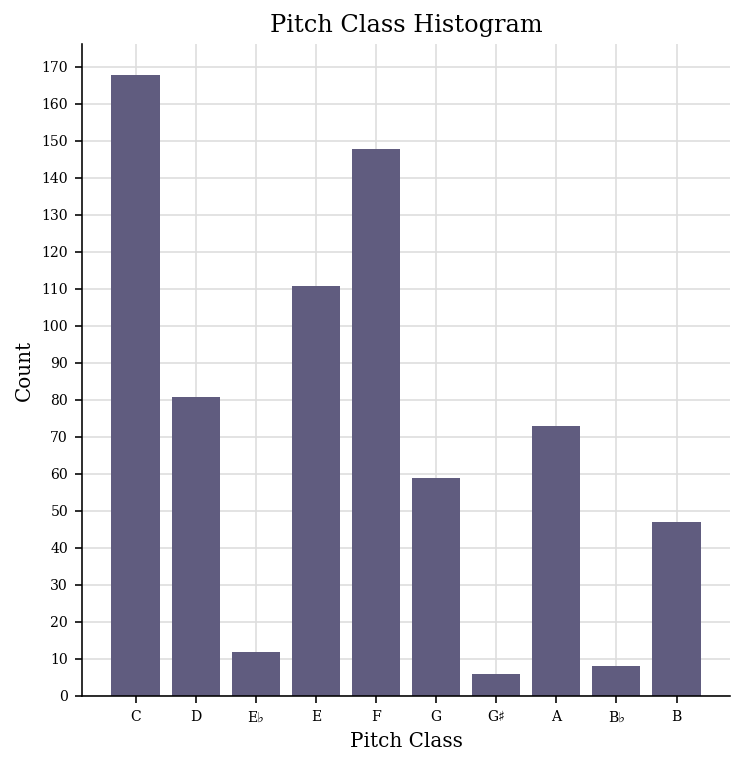

In [26]:
midi_obj.plot('histogram', 'pitchClass', 'count')

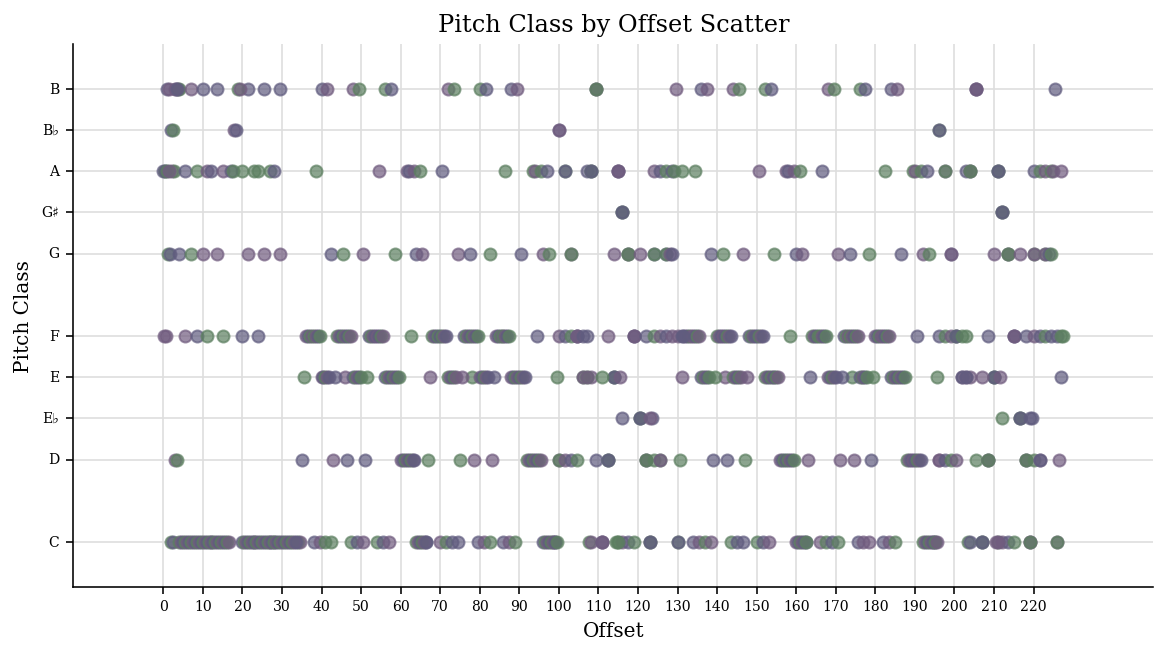

In [27]:
midi_obj.plot('scatter', 'offset', 'pitchClass')

In [28]:
def get_notes():
    notes = []
    
    for file in glob.glob("../midi/Sonic the Hedgehog - Green Hill Zone.mid"):
        midi = converter.parse(file)
        
        notes_to_parse = None
        
        try:
            s2 = instrument.partitionByInstrument(midi)
            notes_to_parse = s2.parts[0].recurse()
        except:
            note_to_parse = midi.flat.notes
            
        for element in notes_to_parse:
            if isinstance(element, note.Note):
                notes.append(str(element.pitch))
            elif isinstance(element, chord.Chord):
                notes.append('.'.join(str(n) for n in element.normalOrder))
        
        #with open('./', 'wb') as filepath:
        #    pickle.dump(notes, filepath)
            
        return notes

In [29]:
get_notes()

['A5',
 'F5',
 'A5',
 'A1',
 'F5',
 'B5',
 'A2',
 'G5',
 'B5',
 'A1',
 'G5',
 'C6',
 'B-1',
 'A5',
 'C6',
 'B-2',
 'A5',
 'D6',
 'B1',
 'B5',
 'D6',
 'B2',
 'B5',
 '7.11',
 'C2',
 'C2',
 'C2',
 '5.9',
 'C2',
 'C2',
 'C2',
 '7.11',
 'C2',
 'C2',
 'C2',
 '5.9',
 'C2',
 'C2',
 'C2',
 '7.11',
 'C2',
 'C2',
 '5.9',
 'C2',
 'C2',
 '9.0',
 'C2',
 'C2',
 'C2',
 '7.11',
 'C2',
 'C2',
 'C2',
 '5.9',
 'C2',
 'C2',
 'C2',
 'C2',
 'A1',
 'A1',
 'B-1',
 'B-1',
 'B1',
 'B1',
 '5.9',
 'C2',
 'C2',
 'C2',
 '7.11',
 'C2',
 'C2',
 'C2',
 '9.0',
 'C2',
 'C2',
 '5.9',
 'C2',
 'C2',
 'C2',
 '7.11',
 'C2',
 'C2',
 'C2',
 '9.0',
 'C2',
 'C2',
 '9.0',
 'C2',
 'C2',
 'C2',
 '7.11',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'C2',
 'D2',
 'E2',
 'F2',
 'F2',
 'F2',
 'F2',
 'C6',
 'F2',
 'A5',
 'F2',
 'F2',
 'C6',
 'F2',
 'B5',
 'E2',
 'E2',
 'C6',
 'E2',
 'B5',
 'E2',
 'E2',
 'G5',
 'C2',
 'D2',
 'E2',
 'F2',
 'F2',
 'F2',
 'G5',
 'F2',
 'E6',
 'F2',
 'D6',
 'F2',
 'F2',
 'C6',
 'F2',